# Text Complexity with *textstat*

Textstat is a Python library that is used to determine the complexity of a given text. 

It provides various measures of complexity, including the Flesch Reading Ease Score, the Flesch-Kincaid Grade Level, and the Automated Readability Index. 

These measures can be used to assess the readability of a text and help determine the appropriate audience for a given piece of content. 

Textstat also provides other useful metrics such as the number of words, sentences, and syllables in a text, as well as the average length of words and sentences. 

With Textstat, it is easy to analyze the complexity of a text and make informed decisions about its readability.

In [53]:
import textstat
import pandas as pd

In [54]:
test_data = (
    "Playing games has always been thought to be important to "
    "the development of well-balanced and creative children; "
    "however, what part, if any, they should play in the lives "
    "of adults has never been researched that deeply. I believe "
    "that playing games is every bit as important for adults "
    "as for children. Not only is taking time out to play games "
    "with our children and other adults valuable to building "
    "interpersonal relationships but is also a wonderful way "
    "to release built up tension.")

In [55]:
textstat.flesch_reading_ease(test_data)


52.23

In [56]:
textstat.flesch_kincaid_grade(test_data)

12.8

In [57]:
textstat.gunning_fog(test_data)

12.38

In [58]:
textstat.smog_index(test_data) # do it on text with more than 30 sentences

12.5

In [59]:
textstat.dale_chall_readability_score(test_data)

7.3

In [60]:
textstat.text_standard(test_data, float_output=False)

'12th and 13th grade'

## Implementing text complexity for our dataset

In [61]:
df = pd.read_excel('output-merged.xlsx')
df = df[['Title', 'Content']]
df

,Title,Content
0,\n Russia’s shadowy energy trade is raisi...,"The waters of the Bay of Lakonikos, on the sou..."
1,\n China makes major push in its ambitiou...,Public sector workers in an eastern Chinese ci...
2,\n ‘Too good to be true?’ As Shein and Te...,Temu and Shein are taking off in the United St...
3,\n NBCUniversal CEO stepping down over ‘i...,NBCUniversal CEO Jeff Shell is leaving the com...
4,\n What happens to buybuy BABY with Bed B...,America’s leading specialty baby products reta...
...,...,...
1244,Massachusetts town says Avian Flu detected amo...,Fox News Flash top headlines are here. Check o...
1245,The world lost faith in childhood vaccines dur...,Fox News Flash top headlines are here. Check o...
1246,Smart tips to reduce caregiver stress — here's...,Nearly 15% of caregivers reported having 14 or...
1247,Love that ‘new car smell’? Study says there ar...,‘Fox & Friends Weekend’ co-hosts take a look a...


In [62]:
df['Flesch Reading'] = 0
for i, row in df.iterrows():
    text = row['Content']  # replace 'text_column' with the name of the column containing the text
    score = textstat.flesch_reading_ease(text)
    df.loc[i, 'Flesch Reading'] = score

In [63]:
df['Flesch-Kincaid'] = 0
for i, row in df.iterrows():
    text = row['Content']  # replace 'text_column' with the name of the column containing the text
    score = textstat.flesch_kincaid_grade(text)
    df.loc[i, 'Flesch-Kincaid'] = score

In [64]:
df['Smog Index'] = 0
for i, row in df.iterrows():
    text = row['Content']  # replace 'text_column' with the name of the column containing the text
    score = textstat.smog_index(text)
    df.loc[i, 'Smog Index'] = score

In [65]:
df['Standard Score'] = 0
for i, row in df.iterrows():
    text = row['Content']  # replace 'text_column' with the name of the column containing the text
    score = textstat.text_standard(text, float_output=False)
    df.loc[i, 'Standard Score'] = score

In [66]:
df

,Title,Content,Flesch Reading,Flesch-Kincaid,Smog Index,Standard Score
0,\n Russia’s shadowy energy trade is raisi...,"The waters of the Bay of Lakonikos, on the sou...",59.03,10.1,11.2,10th and 11th grade
1,\n China makes major push in its ambitiou...,Public sector workers in an eastern Chinese ci...,48.23,12.2,14.2,12th and 13th grade
2,\n ‘Too good to be true?’ As Shein and Te...,Temu and Shein are taking off in the United St...,51.28,11.1,13.3,11th and 12th grade
3,\n NBCUniversal CEO stepping down over ‘i...,NBCUniversal CEO Jeff Shell is leaving the com...,52.70,10.5,11.8,11th and 12th grade
4,\n What happens to buybuy BABY with Bed B...,America’s leading specialty baby products reta...,58.32,10.4,11.2,9th and 10th grade
...,...,...,...,...,...,...
1244,Massachusetts town says Avian Flu detected amo...,Fox News Flash top headlines are here. Check o...,58.01,10.5,12.6,12th and 13th grade
1245,The world lost faith in childhood vaccines dur...,Fox News Flash top headlines are here. Check o...,50.16,11.5,12.8,9th and 10th grade
1246,Smart tips to reduce caregiver stress — here's...,Nearly 15% of caregivers reported having 14 or...,56.15,9.2,11.2,9th and 10th grade
1247,Love that ‘new car smell’? Study says there ar...,‘Fox & Friends Weekend’ co-hosts take a look a...,49.75,11.6,14.1,11th and 12th grade


The table is an example of values. While the maximum score is 121.22, there is no limit on how low the score can be. A negative score is valid.
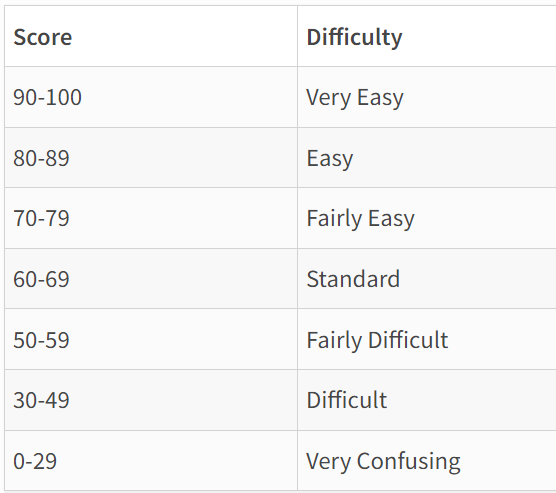

Text(0, 0.5, 'Frequency')

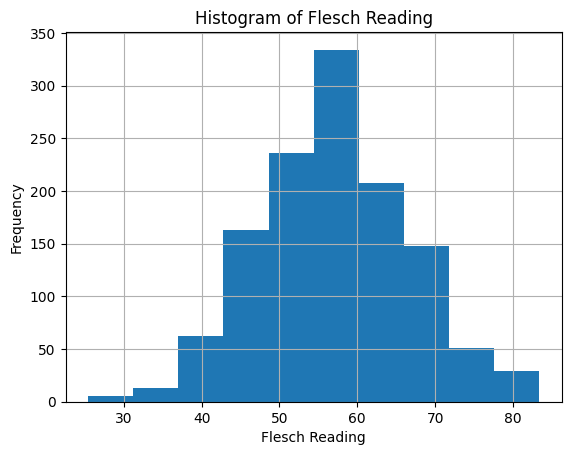

In [67]:
import matplotlib.pyplot as plt
df['Flesch Reading'].hist()
plt.title('Histogram of Flesch Reading')
plt.xlabel('Flesch Reading')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

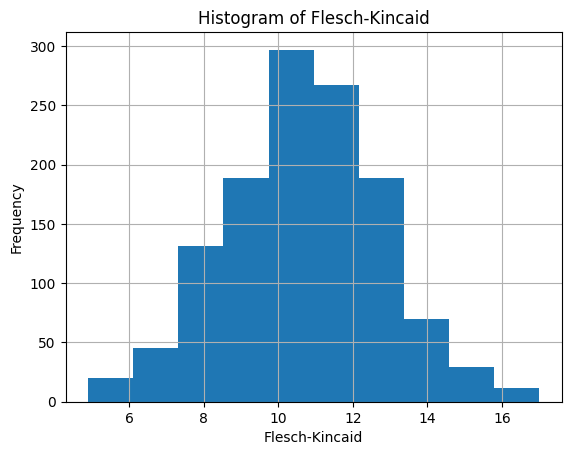

In [68]:
df['Flesch-Kincaid'].hist()
plt.title('Histogram of Flesch-Kincaid')
plt.xlabel('Flesch-Kincaid')
plt.ylabel('Frequency')

# score of 10-12 means a 10th to 12th grader can read the articles

Text(0, 0.5, 'Frequency')

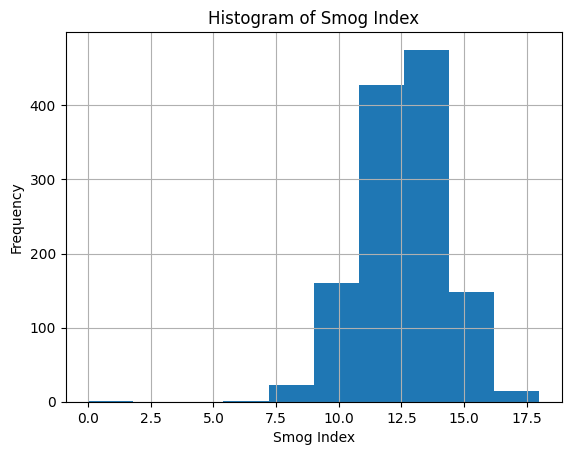

In [69]:
df['Smog Index'].hist()
plt.title('Histogram of Smog Index')
plt.xlabel('Smog Index')
plt.ylabel('Frequency')

# smog index of 12.5 means a 12th grader could read the article